In [1]:
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [91]:
USE_COLUMNS = ['Countrycode', 'AirQualityStation', 'SamplingPoint', 'SamplingProcess', 'UnitOfMeasurement', 'Concentration', 'AveragingTime', 'DatetimeEnd', 'Validity', 'Verification']
INDEX_COLUMNS = ['DatetimeEnd']
CSV_PATH = '../datasources/pollutants_source/$pollutant_id$/'
CSV_AQI_PATH = '../datasources/aqi_calc/'
CSV_FILTER = "*.csv"
POL_ID_PARAM = '$pollutant_id$'
METADATA_USE_COLUMNS = ['Countrycode', 'AirQualityStation', 'SamplingProces', 'AirPollutantCode', 'Longitude', 'Latitude', 'Altitude', 'AirQualityStationType', 'AirQualityStationArea']
METADATA_CSV_PATH = '../datasources/aq/PanEuropean_metadata.csv'
POL_CODES = [7, 6001, 5, 8]
POL_NAMES = {7: "O3", 6001: "PM2.5", 5: "PM10", 8: "NO2", 10: "CO", 1: "SO2", }
POL_URL = "http://dd.eionet.europa.eu/vocabulary/aq/pollutant/"

In [94]:
df_list= list()
for pol_id in POL_CODES:
    df = pd.concat(map(lambda p: pd.read_csv(p, usecols=USE_COLUMNS, index_col='DatetimeEnd', parse_dates=['DatetimeEnd']), glob.glob(os.path.join(CSV_PATH.replace(POL_ID_PARAM, str(pol_id)), CSV_FILTER))))
    print(f'Pollutant: {POL_NAMES[pol_id] :10}Lines count: {df.shape[0]}')
    df_list.append(df)

Pollutant: O3        Lines count: 70526
Pollutant: PM2.5     Lines count: 86933
Pollutant: PM10      Lines count: 70407
Pollutant: NO2       Lines count: 70695


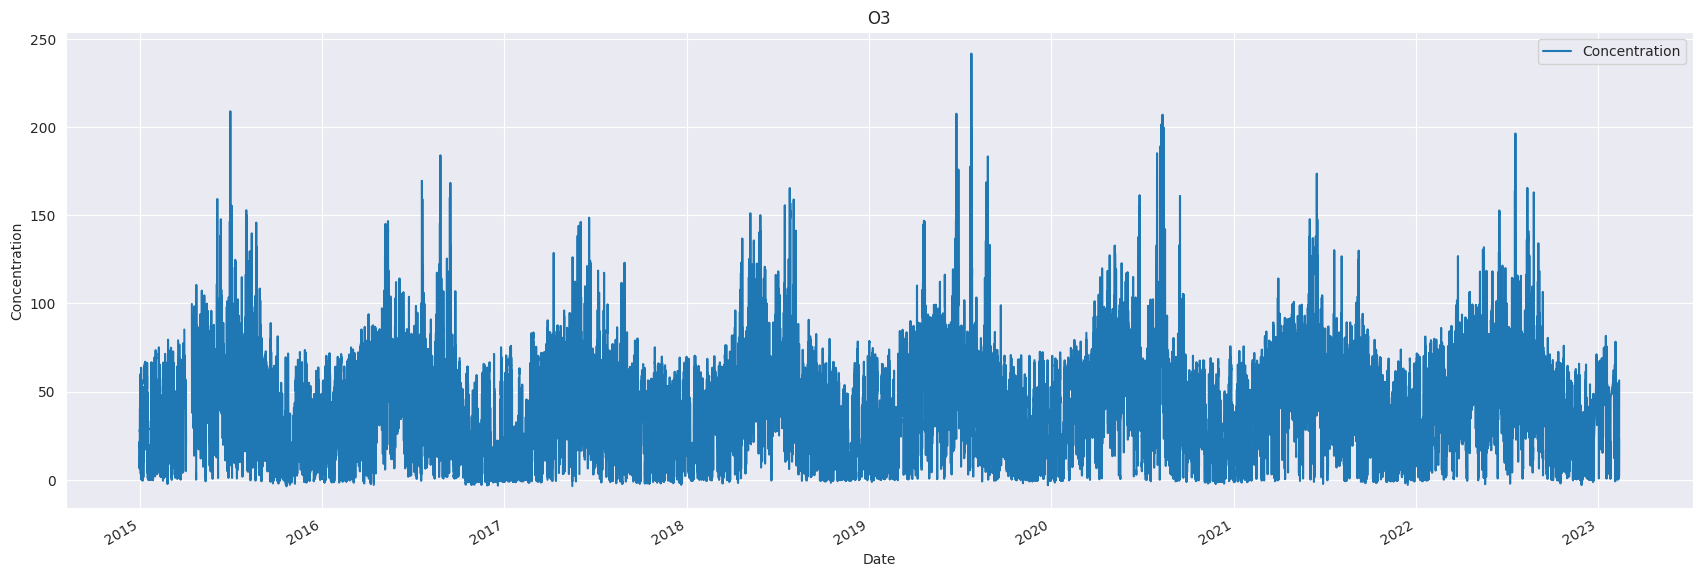

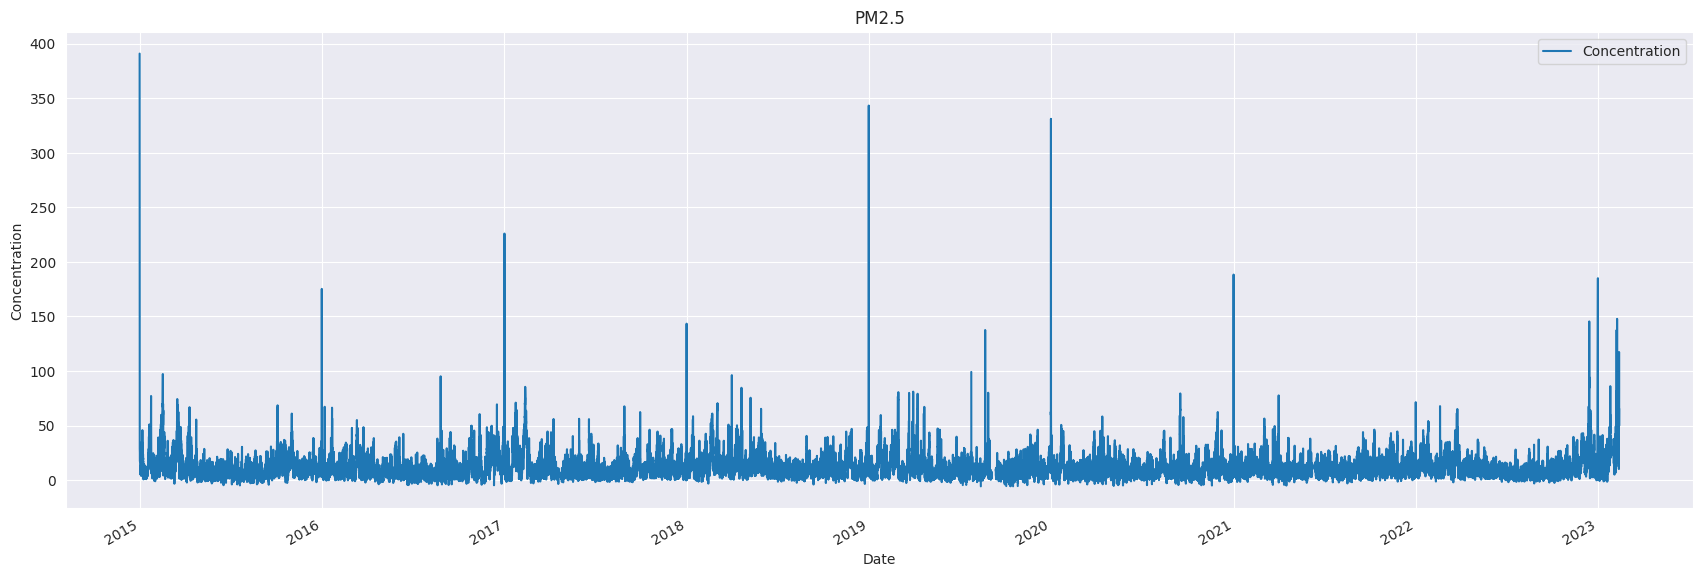

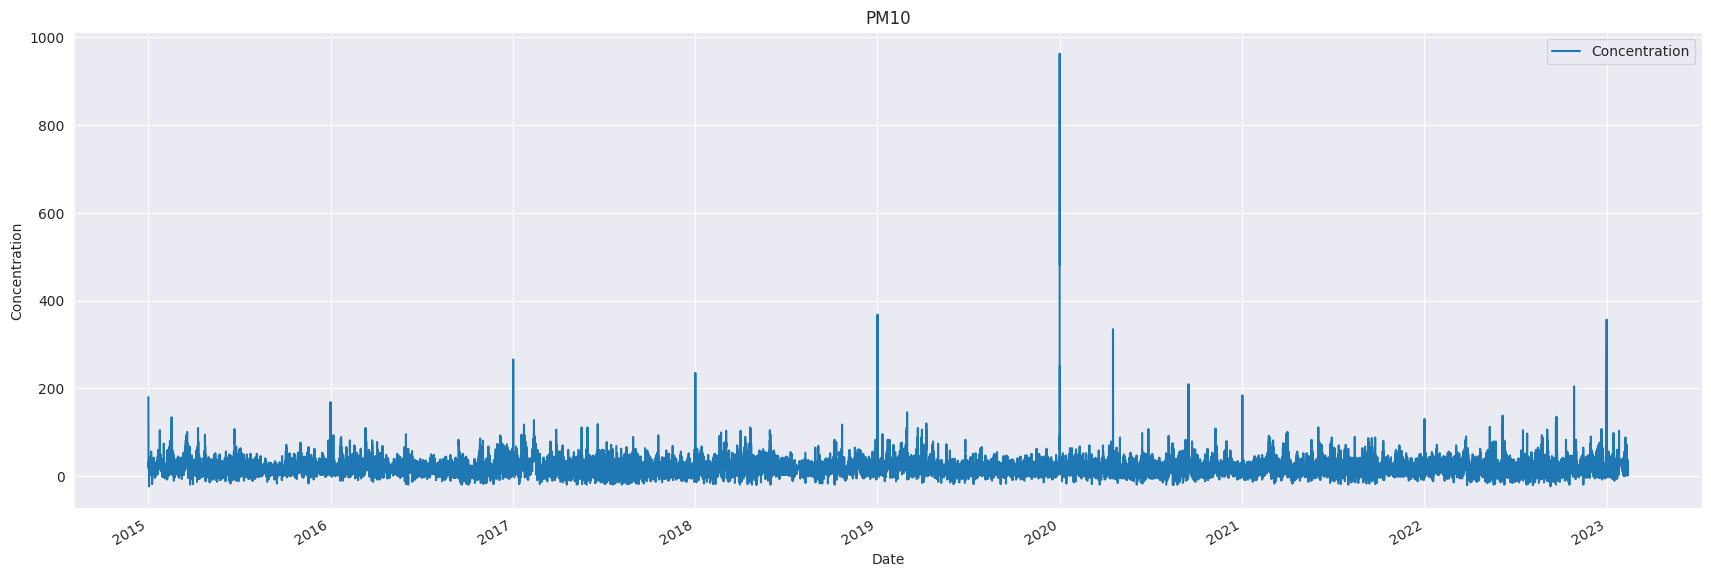

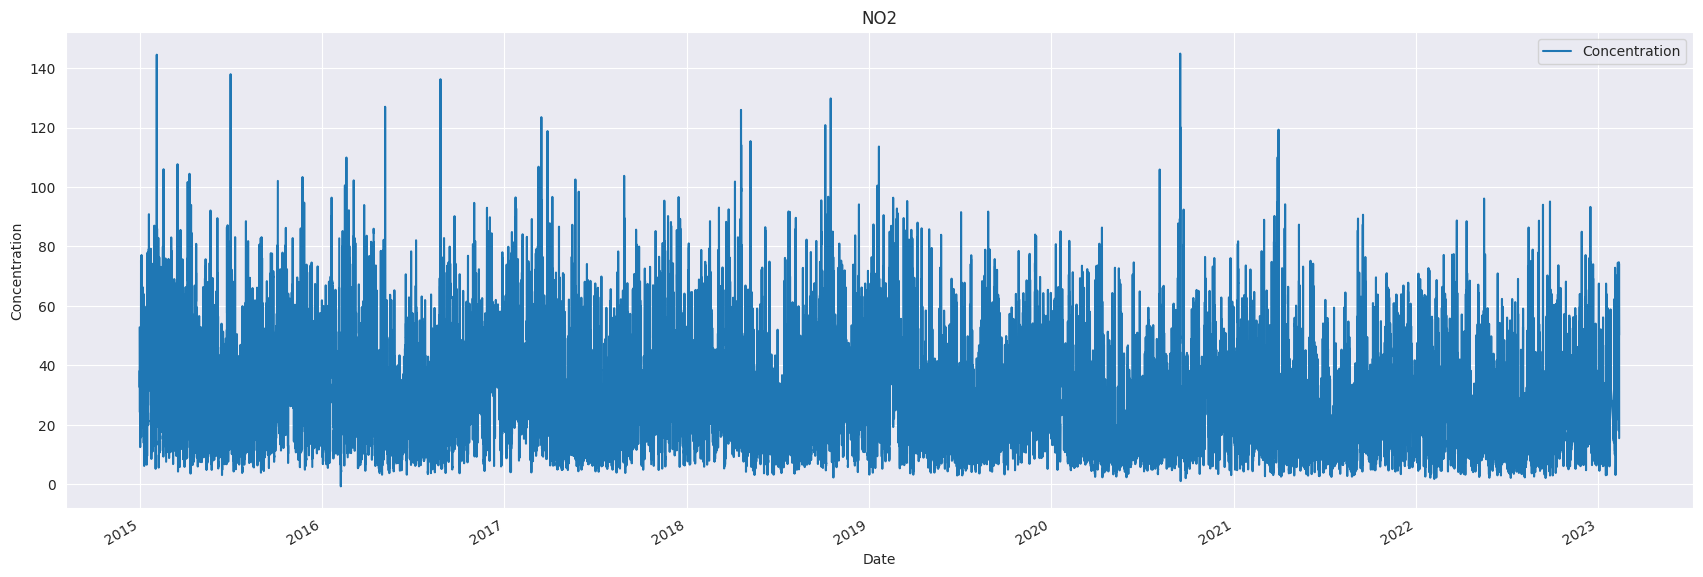

In [95]:
for i in range(len(POL_CODES)):
    axs = plt.gca()
    df_list[i].plot(xlabel="Date", ylabel="Concentration", title=POL_NAMES[POL_CODES[i]],  y='Concentration', c='tab:blue', figsize=(21,7), ax=axs)
    plt.show()

In [96]:
for i in range(len(POL_CODES)):
    df_list[i]['year'] = df_list[i].index.year
    df_list[i]['month'] = df_list[i].index.month

In [97]:
#PM2.5
df_list[1].groupby('year')['Concentration'].idxmax()

year
2015   2015-01-01 01:00:00+01:00
2016   2016-01-01 01:00:00+01:00
2017   2017-01-01 01:00:00+01:00
2018   2018-01-01 01:00:00+01:00
2019   2019-01-01 01:00:00+01:00
2020   2020-01-01 02:00:00+01:00
2021   2021-01-01 02:00:00+01:00
2022   2022-12-14 17:00:00+01:00
2023   2023-01-01 01:00:00+01:00
Name: Concentration, dtype: datetime64[ns, pytz.FixedOffset(60)]

In [98]:
#PM10
df_list[2].groupby('year')['Concentration'].idxmax()

year
2015   2015-01-01 01:00:00+01:00
2016   2016-01-01 01:00:00+01:00
2017   2017-01-01 01:00:00+01:00
2018   2018-01-01 00:00:00+01:00
2019   2019-01-01 01:00:00+01:00
2020   2020-01-01 01:00:00+01:00
2021   2021-01-01 02:00:00+01:00
2022   2022-10-27 18:00:00+01:00
2023   2023-01-01 01:00:00+01:00
Name: Concentration, dtype: datetime64[ns, pytz.FixedOffset(60)]

In [99]:
#O3
df_list[0].groupby(['year'])['Concentration'].idxmax()

year
2015   2015-07-01 19:00:00+01:00
2016   2016-08-25 18:00:00+01:00
2017   2017-06-19 17:00:00+01:00
2018   2018-07-26 17:00:00+01:00
2019   2019-07-25 16:00:00+01:00
2020   2020-08-11 16:00:00+01:00
2021   2021-06-16 18:00:00+01:00
2022   2022-07-19 19:00:00+01:00
2023   2023-01-16 23:00:00+01:00
Name: Concentration, dtype: datetime64[ns, pytz.FixedOffset(60)]

In [100]:
#O3
df_list[0].groupby(['year'])['Concentration'].idxmin()

year
2015   2015-10-22 08:00:00+01:00
2016   2016-12-18 23:00:00+01:00
2017   2017-05-17 00:00:00+01:00
2018   2018-03-14 02:00:00+01:00
2019   2019-12-26 00:00:00+01:00
2020   2020-11-26 09:00:00+01:00
2021   2021-12-16 02:00:00+01:00
2022   2022-11-29 08:00:00+01:00
2023   2023-02-04 22:00:00+01:00
Name: Concentration, dtype: datetime64[ns, pytz.FixedOffset(60)]